In [1]:
import sklearn
print(sklearn.__version__)

1.1.1


In [3]:
pip install pymssql

     ---------------------------------------- 1.5/1.5 MB 31.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [37]:
import pandas as pd
import pymssql

In [38]:
conn = pymssql.connect('gen10-data-fundamentals-22-05-sql-server.database.windows.net', 'group4', 'School4!', 'school-finances')

In [39]:
cursor = conn.cursor()

In [40]:
censusTableSQL = f"SELECT * FROM masterTable"
masterTable = pd.read_sql(censusTableSQL, conn)
masterTable.head()

,School_district,Total_revenue_state,Total_revenue_from_local_sources,SPED_rev_state,COE_pupil_support,Property_tax_revenue,Total_salaries_and_wages,STATEREV_gifted_and_talented_programs,Total_revenue,Total_federal_revenue,...,County_name,Enrollment_count,Graduation_count,local_cnt,Regular_degree_count,Advanced_degree_count,Non_diploma_count,still_enr_cnt,ged_cnt,dropout_cnt
0,ADDISON CENTRAL SCHOOL DISTRICT,23945,7354,1899,903,6015,15331,0,33016,1717,...,STEUBEN,87,78,8,47,23,1,5,0,3
1,ADIRONDACK CENTRAL SCHOOL DISTRICT,18830,10309,2176,924,8648,14130,0,30563,1424,...,ONEIDA,85,78,9,43,26,1,2,0,4
2,AFTON CENTRAL SCHOOL DISTRICT,11390,5139,1104,492,3753,7869,0,17254,725,...,CHENANGO,40,33,4,24,5,1,2,0,4
3,AKRON CENTRAL SCHOOL DISTRICT,20945,10612,2453,1041,8361,15775,0,33543,1986,...,ERIE,119,112,0,36,76,0,4,0,3
4,ALBANY CITY SCHOOL DISTRICT,124062,128477,28664,21477,106935,121226,0,271289,18750,...,ALBANY,722,508,29,347,132,8,110,8,88


In [41]:
masterTable['index_col'] = masterTable.index


In [42]:
display(masterTable)

,School_district,Total_revenue_state,Total_revenue_from_local_sources,SPED_rev_state,COE_pupil_support,Property_tax_revenue,Total_salaries_and_wages,STATEREV_gifted_and_talented_programs,Total_revenue,Total_federal_revenue,...,Enrollment_count,Graduation_count,local_cnt,Regular_degree_count,Advanced_degree_count,Non_diploma_count,still_enr_cnt,ged_cnt,dropout_cnt,index_col
0,ADDISON CENTRAL SCHOOL DISTRICT,23945,7354,1899,903,6015,15331,0,33016,1717,...,87,78,8,47,23,1,5,0,3,0
1,ADIRONDACK CENTRAL SCHOOL DISTRICT,18830,10309,2176,924,8648,14130,0,30563,1424,...,85,78,9,43,26,1,2,0,4,1
2,AFTON CENTRAL SCHOOL DISTRICT,11390,5139,1104,492,3753,7869,0,17254,725,...,40,33,4,24,5,1,2,0,4,2
3,AKRON CENTRAL SCHOOL DISTRICT,20945,10612,2453,1041,8361,15775,0,33543,1986,...,119,112,0,36,76,0,4,0,3,3
4,ALBANY CITY SCHOOL DISTRICT,124062,128477,28664,21477,106935,121226,0,271289,18750,...,722,508,29,347,132,8,110,8,88,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,WYANDANCH UNION FREE SCHOOL DISTRICT,48232,22803,8334,3077,20214,40524,0,75750,4715,...,190,102,0,79,23,2,52,0,33,600
601,YONKERS CITY SCHOOL DISTRICT,392963,234118,47788,25555,0,337273,0,670050,42969,...,1889,1672,48,1258,366,8,145,0,64,601
602,YORK CENTRAL SCHOOL DISTRICT,10908,5263,0,451,4654,8871,0,16775,604,...,62,59,0,20,39,0,2,0,1,602
603,YORKSHIRE-PIONEER CENTRAL SCHOOL DISTRICT,41644,13119,5356,1625,10539,28353,0,57548,2785,...,209,187,8,95,84,2,7,0,13,603


In [43]:
masterTable = masterTable.dropna()

In [44]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [45]:
masterTable = masterTable.drop(columns=['School_district', 'Needs', 'County_name', 'School_district2', 'School_district3'])
display(masterTable)

,Total_revenue_state,Total_revenue_from_local_sources,SPED_rev_state,COE_pupil_support,Property_tax_revenue,Total_salaries_and_wages,STATEREV_gifted_and_talented_programs,Total_revenue,Total_federal_revenue,FEDREV_math_science_teach_quality,...,Enrollment_count,Graduation_count,local_cnt,Regular_degree_count,Advanced_degree_count,Non_diploma_count,still_enr_cnt,ged_cnt,dropout_cnt,index_col
0,23945,7354,1899,903,6015,15331,0,33016,1717,0,...,87,78,8,47,23,1,5,0,3,0
1,18830,10309,2176,924,8648,14130,0,30563,1424,0,...,85,78,9,43,26,1,2,0,4,1
2,11390,5139,1104,492,3753,7869,0,17254,725,0,...,40,33,4,24,5,1,2,0,4,2
3,20945,10612,2453,1041,8361,15775,0,33543,1986,0,...,119,112,0,36,76,0,4,0,3,3
4,124062,128477,28664,21477,106935,121226,0,271289,18750,0,...,722,508,29,347,132,8,110,8,88,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,48232,22803,8334,3077,20214,40524,0,75750,4715,0,...,190,102,0,79,23,2,52,0,33,600
601,392963,234118,47788,25555,0,337273,0,670050,42969,0,...,1889,1672,48,1258,366,8,145,0,64,601
602,10908,5263,0,451,4654,8871,0,16775,604,0,...,62,59,0,20,39,0,2,0,1,602
603,41644,13119,5356,1625,10539,28353,0,57548,2785,0,...,209,187,8,95,84,2,7,0,13,603


In [46]:
masterTable.dtypes

Total_revenue_state                          int64
Total_revenue_from_local_sources             int64
SPED_rev_state                               int64
COE_pupil_support                            int64
Property_tax_revenue                         int64
Total_salaries_and_wages                     int64
STATEREV_gifted_and_talented_programs        int64
Total_revenue                                int64
Total_federal_revenue                        int64
FEDREV_math_science_teach_quality            int64
STATEREV_staff_improvement_programs          int64
Total_current_spending_on_programs           int64
Total_expenditure                            int64
Current_spending_on_instruction              int64
Expenditure_instructional_staff_support      int64
Total_expenditure_support_services           int64
Expenditure_gen_administration               int64
Expenditure_school_administration            int64
NUM_NATIVE                                   int64
PER_NATIVE                     

In [47]:
X = masterTable.drop(columns=['dropout_cnt'])
y = masterTable['dropout_cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [48]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

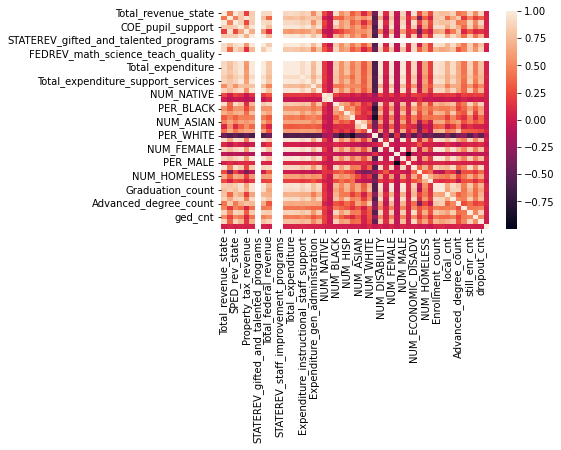

In [49]:
import seaborn as sns
sns.heatmap(masterTable.corr());

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [51]:
pred = regressor.predict(X_test)
print("R-squared: ",  regressor.score(X_test,y_test))

R-squared:  0.6947827269759759


[Text(0.8590326489596469, 0.9666666666666667, 'X[36] <= 188.0\nsquared_error = 295.655\nsamples = 285\nvalue = 8.291'),
 Text(0.7331977064943254, 0.9, 'X[8] <= 4347.0\nsquared_error = 74.423\nsamples = 280\nvalue = 6.39'),
 Text(0.5294471153846154, 0.8333333333333334, 'X[34] <= 754.0\nsquared_error = 25.546\nsamples = 260\nvalue = 4.805'),
 Text(0.2654870744010088, 0.7666666666666667, 'X[34] <= 454.0\nsquared_error = 6.667\nsamples = 181\nvalue = 2.51'),
 Text(0.1526639344262295, 0.7, 'X[36] <= 2.5\nsquared_error = 2.917\nsamples = 119\nvalue = 1.663'),
 Text(0.08291298865069358, 0.6333333333333333, 'X[16] <= 590.0\nsquared_error = 1.179\nsamples = 68\nvalue = 1.027'),
 Text(0.05485498108448928, 0.5666666666666667, 'X[36] <= 1.5\nsquared_error = 1.304\nsamples = 33\nvalue = 1.509'),
 Text(0.029003783102143757, 0.5, 'X[17] <= 153.5\nsquared_error = 0.802\nsamples = 29\nvalue = 1.229'),
 Text(0.01008827238335435, 0.43333333333333335, 'X[13] <= 3324.5\nsquared_error = 0.222\nsamples = 7\n

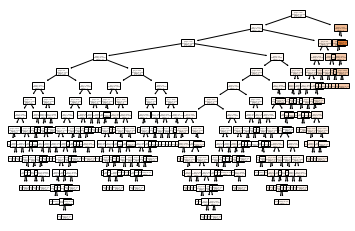

In [52]:
from sklearn import tree
tree.plot_tree(regressor.estimators_[0], filled = True)

Coefficient of determination of training: 
0.9526851389907313
Coefficient of determination of testing: 
0.6947827269759759


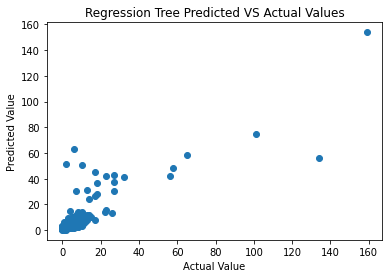

In [53]:
fig1, ax1 = plt.subplots()
ax1.scatter(y_test, pred)
ax1.set_xlabel('Actual Value')
ax1.set_ylabel('Predicted Value')
ax1.set_title('Regression Tree Predicted VS Actual Values')
print(f'Coefficient of determination of training: ')
print(regressor.score((X_train), (y_train)))
print('Coefficient of determination of testing: ')
print(regressor.score((X_test), (y_test)))

Text(0, 0.5, 'Predicted Dropout Rate')

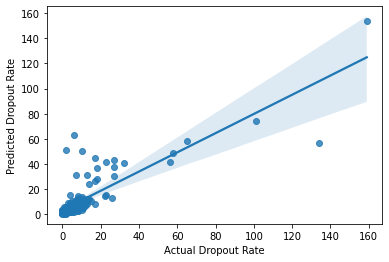

In [54]:
g = sns.regplot(y_test,pred)
g.set_xlabel("Actual Dropout Rate")
g.set_ylabel("Predicted Dropout Rate")

In [55]:
regressor = RandomForestRegressor(n_estimators = 50, max_depth = 15 , max_features= 'sqrt', min_samples_split = 2, min_samples_leaf = 1, bootstrap = True)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=50)

In [56]:
print(f'Coefficient of determination of training: ')
print(regressor.score((X_train), (y_train)))
print('Coefficient of determination of testing: ')
print(regressor.score((X_test), (y_test)))


Coefficient of determination of training: 
0.9607294296858158
Coefficient of determination of testing: 
0.7139373158958098


In [57]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 5.055723684210527
Mean Squared Error: 124.16292565789476
Root Mean Squared Error: 11.142841902221118


In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True], 
              'max_depth': [5, 10, 15, 20], 
              'min_samples_split' : [2, 3, 4, 5, 6],
              'min_samples_leaf' : [1, 2, 3, 4, 5],
              'max_features': ['auto', 'log2', 'sqrt'], 
              'n_estimators': [40, 50, 60, 70, 80, 90, 100]}

g_search = GridSearchCV(estimator = regressor, 
                        param_grid = param_grid, 
                        cv = 3, 
                        n_jobs = 1, 
                        verbose = 0, 
                        return_train_score=True)
g_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(max_depth=15, max_features='sqrt',
                                             n_estimators=50),
             n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15, 20],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [40, 50, 60, 70, 80, 90, 100]},
             return_train_score=True)

In [59]:
print(g_search.best_estimator_)


RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=50)


In [60]:
print(f'Coefficient of determination of training: ')
print(g_search.score((X_train), (y_train)))
print('Coefficient of determination of testing: ')
print(g_search.score((X_test), (y_test)))

Coefficient of determination of training: 
0.9591746044674301
Coefficient of determination of testing: 
0.9628204657897951


In [61]:
from joblib import dump,load

In [62]:
dump(g_search, 'random-forest-regression.model')

['random-forest-regression.model']

In [63]:
X.to_csv('data_without_predictions2.csv', index = False) 